In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [4]:
from sklearn.datasets import load_boston 
import seaborn as sns

In [5]:
boston=load_boston()

In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
#The dataset is a dictionary.The keys are
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [15]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [9]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [10]:
print(type(boston))

<class 'sklearn.utils.Bunch'>


In [11]:
#convert from sklearn to dataframe in pandas

df_boston = pd.DataFrame(boston.data,columns=boston.feature_names)
df_boston['MEDV'] = pd.Series(boston.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
df_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [19]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [20]:
df_boston.shape

(506, 14)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='DIS', ylabel='MEDV'>

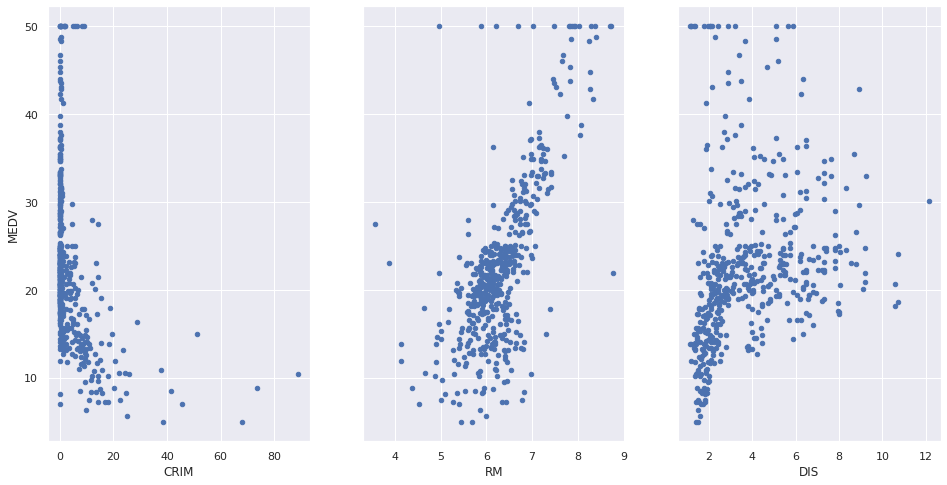

In [21]:
fig,axs=plt.subplots(1,3,sharey=True)
df_boston.plot(kind='scatter', x='CRIM', y='MEDV', ax=axs[0],figsize=(16,8))
df_boston.plot(kind='scatter', x='RM', y='MEDV', ax=axs[1])
df_boston.plot(kind='scatter', x='DIS', y='MEDV', ax=axs[2])

In [22]:
df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

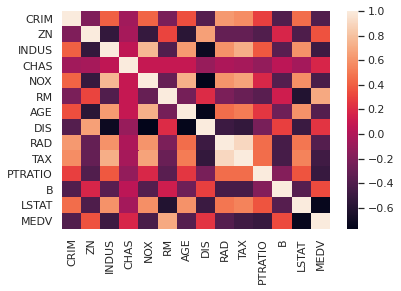

In [23]:
plt.figure(figsize=(6,4))
sns.heatmap(df_boston.corr().round(2))
plt.yticks(rotation=0)
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(12,12)})

<AxesSubplot:xlabel='MEDV'>

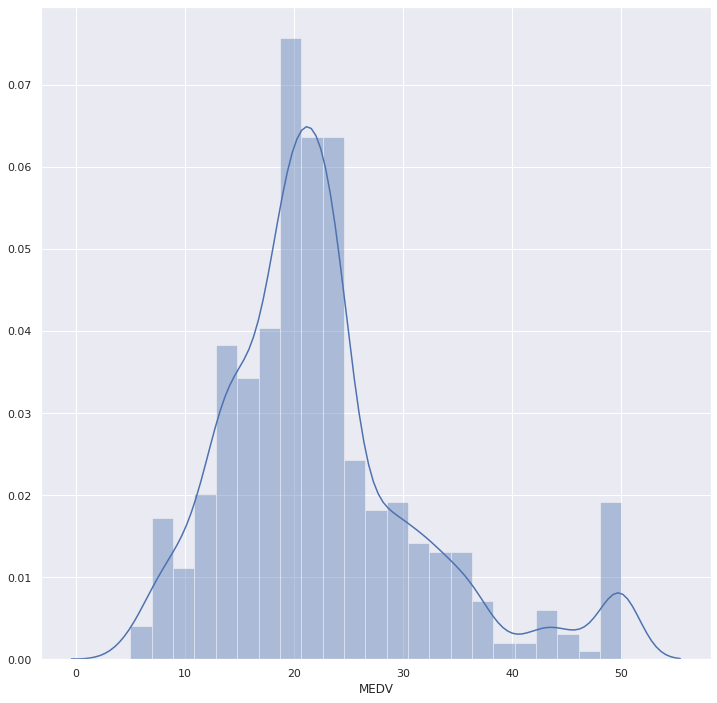

In [24]:
sns.distplot(df_boston['MEDV'])

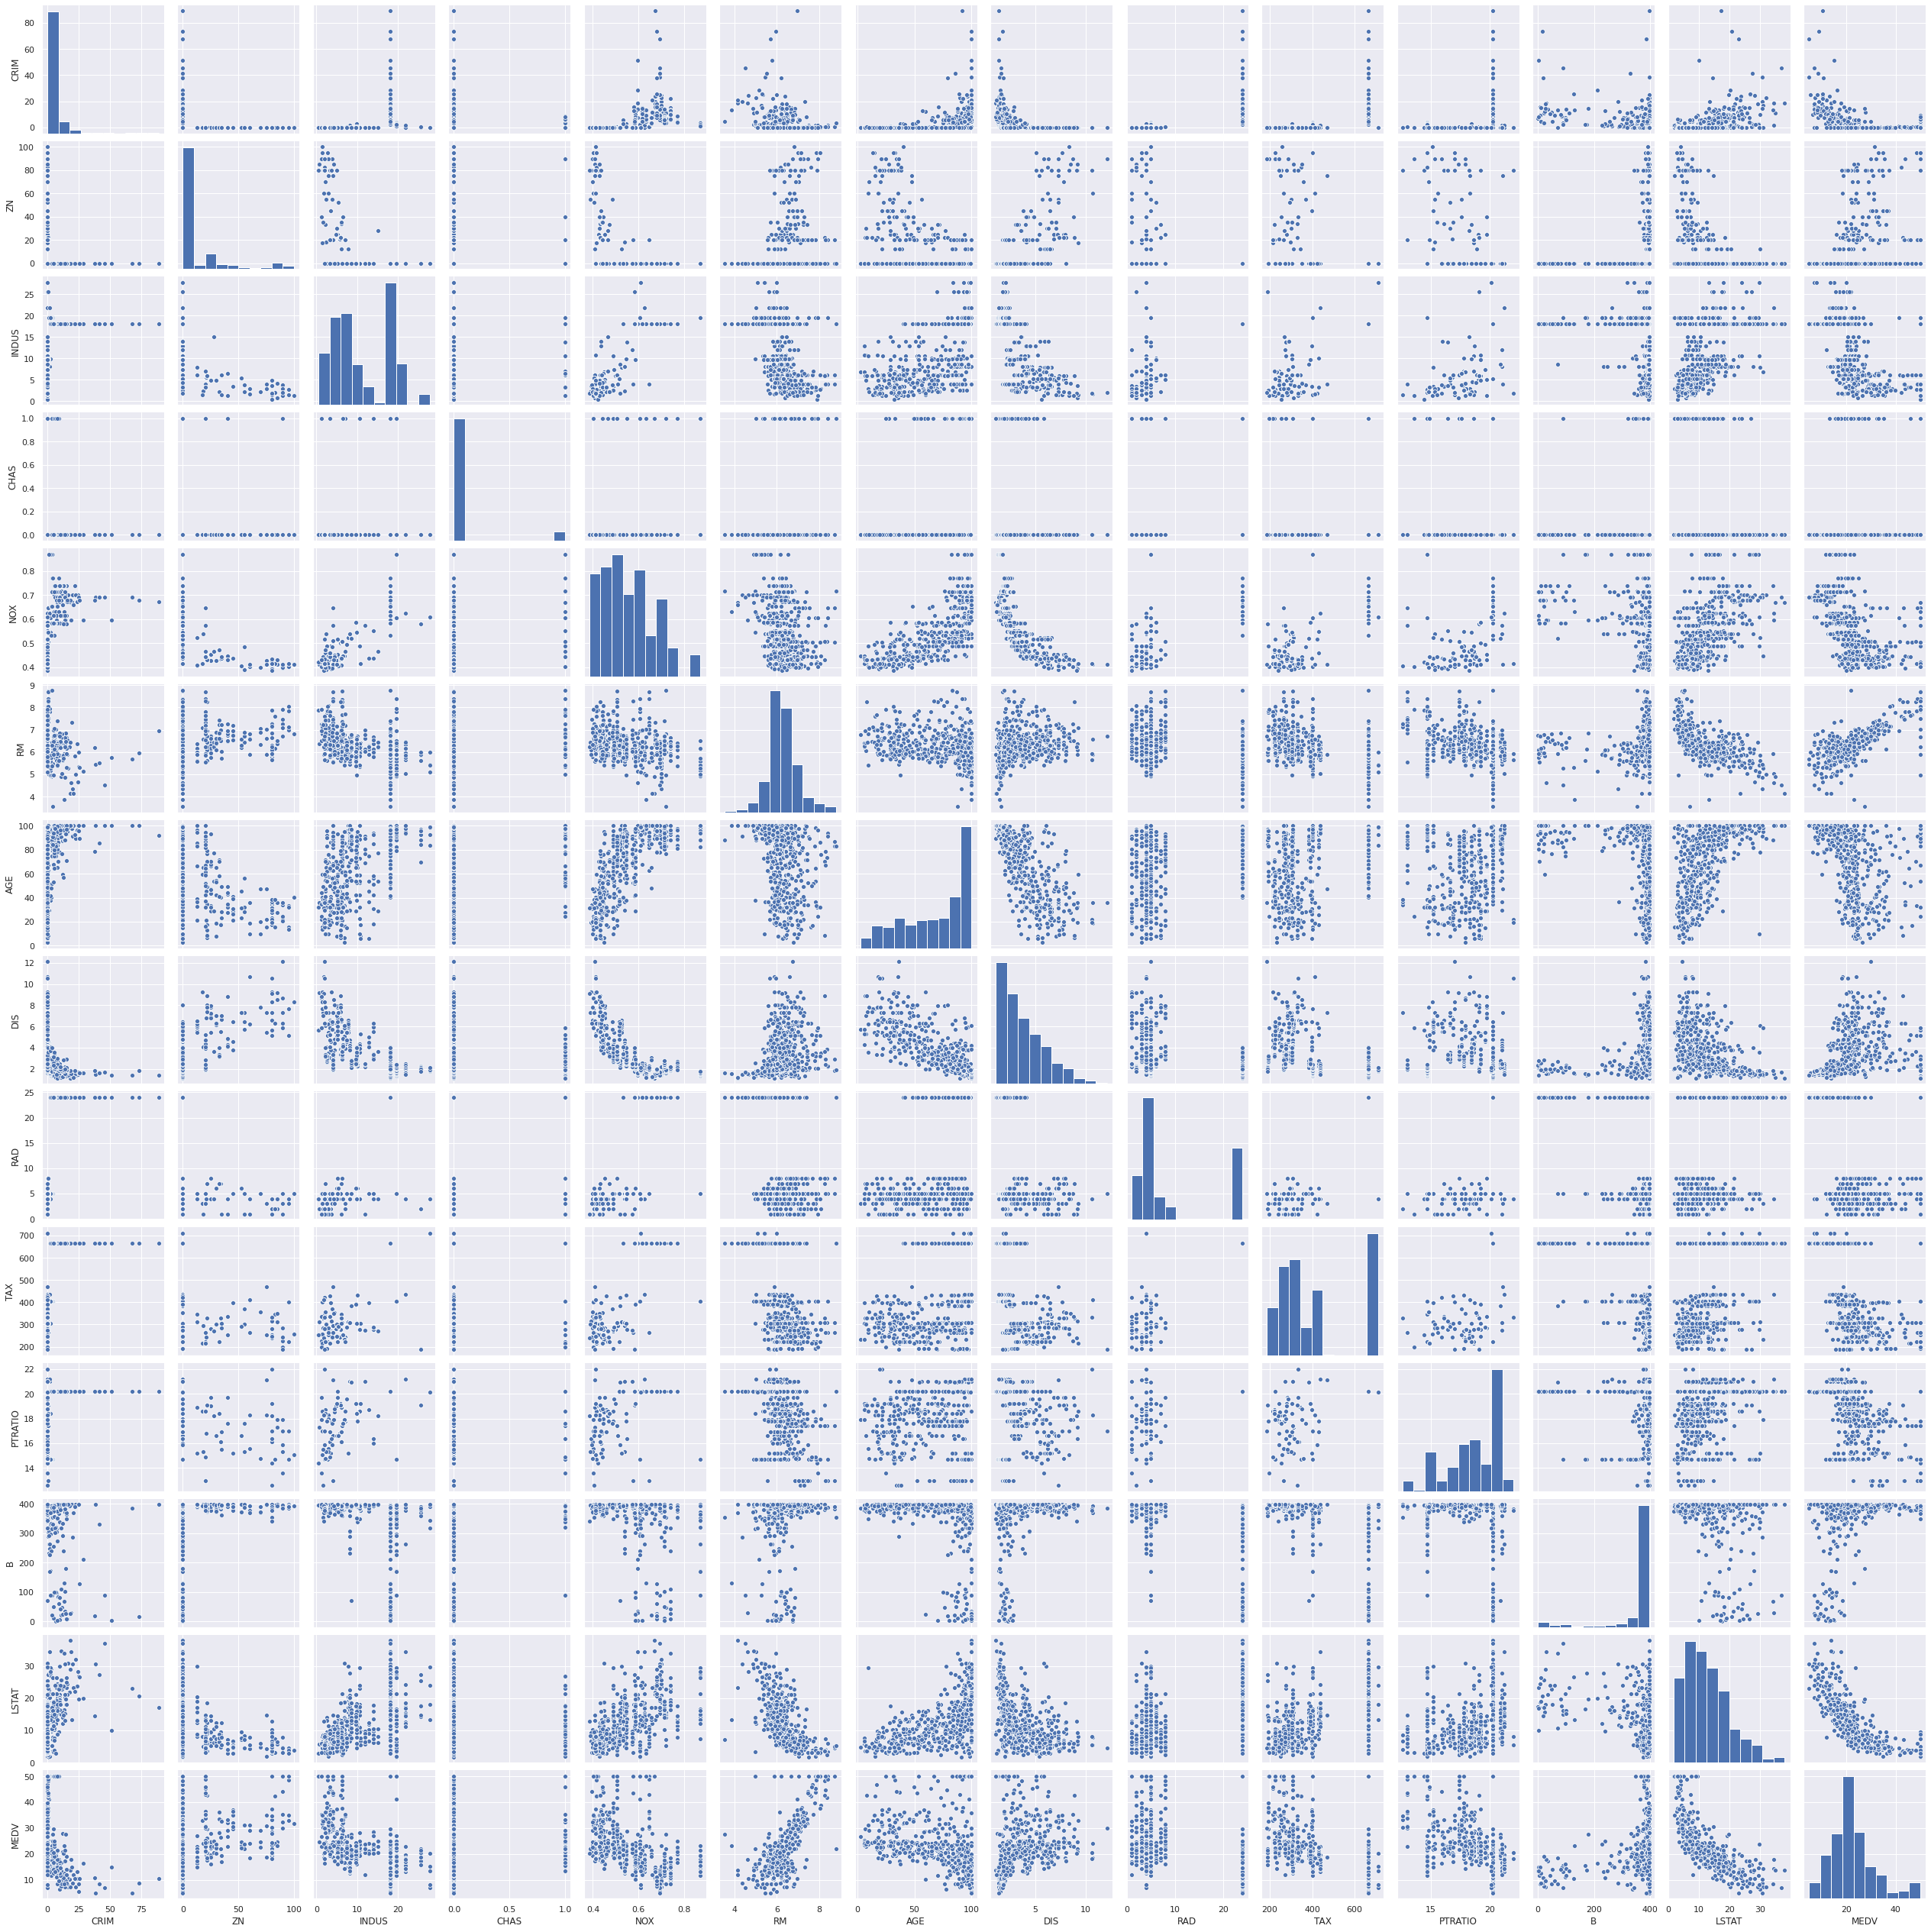

In [27]:
#vizualize pair plot showing relationship between features in dataset
sns.pairplot(df_boston)

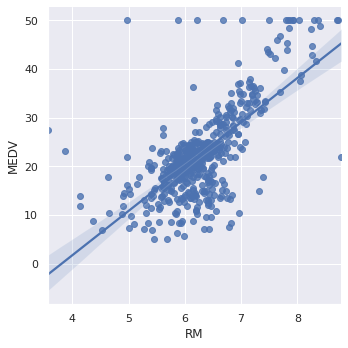

In [28]:
#RM and MEDV seem to have a positive relationship
sns.lmplot(x='RM',y='MEDV',data=df_boston)

In [29]:
#split dataset into train and test

In [30]:
df_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [31]:
df_boston.shape

(506, 14)

In [32]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [33]:
feature_cols=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']
X=df_boston[feature_cols]
y=df_boston.MEDV

In [34]:
#create train/test
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=0.3,random_state=42)

In [35]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(354, 13)
(354,)
(152, 13)
(152,)


In [36]:
#initialize the linear regression model
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
#get coef and intercept for variables
print('Coef:',lm.coef_)
print('Intercept:',lm.intercept_)

Coef: [-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
 -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
  2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
 -5.47113313e-01]
Intercept: 31.631084035691632


In [38]:
#initialize training model
lm=LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
#calculate and print mean sqr error
print('Intercept:',lm.intercept_)
print('Coef:',lm.coef_)

predictions=lm.predict(xtest)
print('MSE:',sqrt(mean_squared_error(ytest,predictions)))

Intercept: 31.631084035691632
Coef: [-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
 -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
  2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
 -5.47113313e-01]
MSE: 4.638689926172867


In [49]:
list(zip(df_boston.columns,lm.coef_))

[('CRIM', -0.1334701028529461),
 ('ZN', 0.03580891359323195),
 ('INDUS', 0.04952264522005543),
 ('CHAS', 3.119835116285394),
 ('NOX', -15.417060895306689),
 ('RM', 4.057199231645403),
 ('AGE', -0.010820835184926221),
 ('DIS', -1.3859982431608788),
 ('RAD', 0.24272733982224926),
 ('TAX', -0.00870223436566183),
 ('PTRATIO', -0.9106852081102881),
 ('B', 0.011794115892575632),
 ('LSTAT', -0.5471133128239569)]

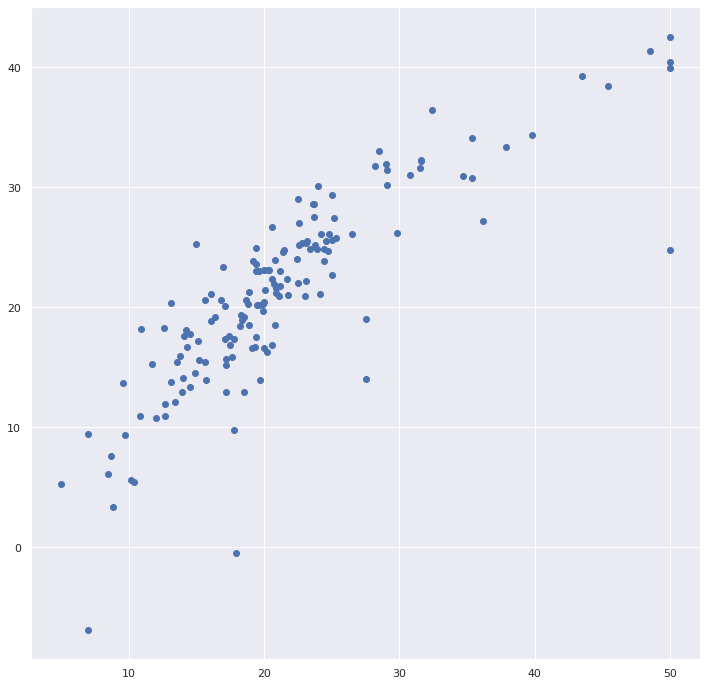

In [40]:
plt.scatter(ytest,predictions)

In [41]:
#create a dataframe for actual and predicted values and creat a graph for the same

In [42]:
df1=pd.DataFrame({'Actual': ytest,'Predicted': predictions})
df2=df1.head(15)
df2

,Actual,Predicted
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


<AxesSubplot:>

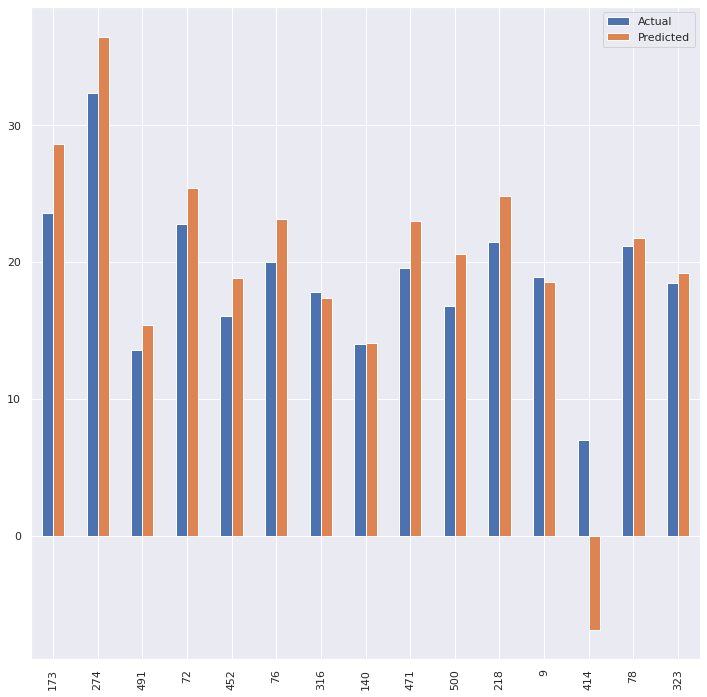

In [43]:
df2.plot(kind='bar')

In [44]:
#looks like the above model works. Model evaluation:

In [45]:
#Ridge, Lasso and ElasticNet models and comparision

In [46]:
from sklearn.linear_model import Ridge
ridgereg=Ridge(alpha=0.001, normalize=True)
ridgereg.fit(xtrain,ytrain)
print('Train SQRT MSE:',sqrt(mean_squared_error(ytrain, ridgereg.predict(xtrain))))
print('Test SQRT MSE:',sqrt(mean_squared_error(ytest, ridgereg.predict(xtest))))
print('R2 Value/Coefficient of Determination:{}'.format(ridgereg.score(xtest,ytest)))

Train SQRT MSE: 4.748229167712649
Test SQRT MSE: 4.639881960030266
R2 Value/Coefficient of Determination:0.7110775704734211


In [47]:
from sklearn.linear_model import Lasso
lassoreg=Lasso(alpha=0.001, normalize=True)
lassoreg.fit(xtrain,ytrain)

print('Train SQRT MSE:', sqrt(mean_squared_error(ytrain,lassoreg.predict(xtrain))))
print('Test SQRT MSE:', sqrt(mean_squared_error(ytest,lassoreg.predict(xtest))))
print('R2 Value/Coefficient of Determination:{}'.format(lassoreg.score(xtest,ytest)))

Train SQRT MSE: 4.750900452460059
Test SQRT MSE: 4.650355164208201
R2 Value/Coefficient of Determination:0.7097717791957663
